<a href="https://colab.research.google.com/github/smurillo1/RegressaoLinear/blob/main/Score_Credito.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **PREVISÃO DO SCORE DE CRÉDITO COM REGRESSÃO LINEAR**

In [ ]:
pip install pandas-profiling

In [87]:
#leitura e tratamento de dados
import pandas as pd
from pandas_profiling import ProfileReport
import numpy as np

#visualização
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split #df train e df test
from sklearn.preprocessing import StandardScaler #normalização
from sklearn.preprocessing import MinMaxScaler #normalização
from sklearn.preprocessing import LabelEncoder #encoding
from sklearn.linear_model import LinearRegression #regressao linear
from sklearn.metrics import r2_score #avaliar accuracy

## Análise Exploratória

In [22]:
df = pd.read_excel('/content/dados_credito.xlsx')

In [23]:
df.head(3)

,CODIGO_CLIENTE,UF,IDADE,ESCOLARIDADE,ESTADO_CIVIL,QT_FILHOS,CASA_PROPRIA,QT_IMOVEIS,VL_IMOVEIS,OUTRA_RENDA,OUTRA_RENDA_VALOR,TEMPO_ULTIMO_EMPREGO_MESES,TRABALHANDO_ATUALMENTE,ULTIMO_SALARIO,QT_CARROS,VALOR_TABELA_CARROS,SCORE
0,1,SP,19,Superior Cursando,Solteiro,0,Não,0,0,Não,0,8,Sim,1800,0,0,12.0
1,2,MG,23,Superior Completo,Solteiro,1,Não,0,0,Não,0,9,Não,4800,1,50000,18.0
2,3,SC,25,Segundo Grau Completo,Casado,0,Sim,1,220000,Não,0,18,Sim,2200,2,30000,23.0


In [10]:
df.tail(3) #verificando se as ultimas linhas exibem algo relacionado a total

,CODIGO_CLIENTE,UF,IDADE,ESCOLARIDADE,ESTADO_CIVIL,QT_FILHOS,CASA_PROPRIA,QT_IMOVEIS,VL_IMOVEIS,OUTRA_RENDA,OUTRA_RENDA_VALOR,TEMPO_ULTIMO_EMPREGO_MESES,TRABALHANDO_ATUALMENTE,ULTIMO_SALARIO,QT_CARROS,VALOR_TABELA_CARROS,SCORE
10473,10474,RJ,51,Superior Cursando,Casado,1,Sim,0,0,Não,0,22,Não,3900,0,0,28.666667
10474,10475,RJ,48,Superior Completo,Divorciado,2,Não,1,370000,Não,0,30,Sim,NaN,1,35000,34.166667
10475,10476,PR,51,Segundo Grau Completo,Divorciado,0,Não,0,0,Não,0,14,Sim,3100,2,40000,39.666667


In [8]:
# Gerando profile report
profile = ProfileReport(df, title="credito", explorative=True)

# salvando html:
profile.to_file("data_profile_report.html")


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10476 entries, 0 to 10475
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   CODIGO_CLIENTE              10476 non-null  int64  
 1   UF                          10476 non-null  object 
 2   IDADE                       10476 non-null  int64  
 3   ESCOLARIDADE                10476 non-null  object 
 4   ESTADO_CIVIL                10476 non-null  object 
 5   QT_FILHOS                   10476 non-null  int64  
 6   CASA_PROPRIA                10476 non-null  object 
 7   QT_IMOVEIS                  10476 non-null  int64  
 8   VL_IMOVEIS                  10476 non-null  int64  
 9   OUTRA_RENDA                 10476 non-null  object 
 10  OUTRA_RENDA_VALOR           10476 non-null  int64  
 11  TEMPO_ULTIMO_EMPREGO_MESES  10476 non-null  int64  
 12  TRABALHANDO_ATUALMENTE      10476 non-null  object 
 13  ULTIMO_SALARIO              104

In [25]:
#excluindo codigo do cliente
df.drop('CODIGO_CLIENTE', axis=1, inplace=True)

In [26]:
#Entendendo a coluna
df['ULTIMO_SALARIO'].value_counts()

1800         846
2200         792
3900         792
3100         792
4800         792
11500        790
6800         611
17500        522
18300        522
5300         522
13000        522
15000        522
9000         522
6100         522
9800         468
4500         468
22000        468
SEM DADOS      1
Name: ULTIMO_SALARIO, dtype: int64

In [27]:
df.loc[df['ULTIMO_SALARIO']=='SEM DADOS']

,UF,IDADE,ESCOLARIDADE,ESTADO_CIVIL,QT_FILHOS,CASA_PROPRIA,QT_IMOVEIS,VL_IMOVEIS,OUTRA_RENDA,OUTRA_RENDA_VALOR,TEMPO_ULTIMO_EMPREGO_MESES,TRABALHANDO_ATUALMENTE,ULTIMO_SALARIO,QT_CARROS,VALOR_TABELA_CARROS,SCORE
10459,RJ,45,Superior Cursando,Solteiro,1,Sim,1,185000,Sim,3000,19,Sim,SEM DADOS,0,0,45.166667


In [28]:
#PARA TRATAR A COLUNA COMO NUMERICA, OPTEI POR TRANSFORMAR O VALOR 'SEM DADOS' EM UM CAMPO VAZIO, PARA TRATÁ-LO DA MESMA QUE FORMA QUE TRATAREI OS DEMAIS.
df.replace('SEM DADOS', np.nan, inplace=True)

In [29]:
#alterando formato da variavel
df['ULTIMO_SALARIO'] = df['ULTIMO_SALARIO'].astype('float64')

In [34]:
df.isnull().sum()

UF                            0
IDADE                         0
ESCOLARIDADE                  0
ESTADO_CIVIL                  0
QT_FILHOS                     0
CASA_PROPRIA                  0
QT_IMOVEIS                    0
VL_IMOVEIS                    0
OUTRA_RENDA                   0
OUTRA_RENDA_VALOR             0
TEMPO_ULTIMO_EMPREGO_MESES    0
TRABALHANDO_ATUALMENTE        0
ULTIMO_SALARIO                0
QT_CARROS                     0
VALOR_TABELA_CARROS           0
SCORE                         0
dtype: int64

In [33]:
#Substituindo valores NAN pela mediana
df['ULTIMO_SALARIO'] = df['ULTIMO_SALARIO'].fillna((df['ULTIMO_SALARIO'].median()))

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10476 entries, 0 to 10475
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   UF                          10476 non-null  object 
 1   IDADE                       10476 non-null  int64  
 2   ESCOLARIDADE                10476 non-null  object 
 3   ESTADO_CIVIL                10476 non-null  object 
 4   QT_FILHOS                   10476 non-null  int64  
 5   CASA_PROPRIA                10476 non-null  object 
 6   QT_IMOVEIS                  10476 non-null  int64  
 7   VL_IMOVEIS                  10476 non-null  int64  
 8   OUTRA_RENDA                 10476 non-null  object 
 9   OUTRA_RENDA_VALOR           10476 non-null  int64  
 10  TEMPO_ULTIMO_EMPREGO_MESES  10476 non-null  int64  
 11  TRABALHANDO_ATUALMENTE      10476 non-null  object 
 12  ULTIMO_SALARIO              10476 non-null  float64
 13  QT_CARROS                   104

In [36]:
df.describe()

,IDADE,QT_FILHOS,QT_IMOVEIS,VL_IMOVEIS,OUTRA_RENDA_VALOR,TEMPO_ULTIMO_EMPREGO_MESES,ULTIMO_SALARIO,QT_CARROS,VALOR_TABELA_CARROS,SCORE
count,10476.000000,10476.000000,10476.000000,10476.000000,10476.000000,10476.000000,10476.000000,10476.000000,10476.000000,10476.000000
mean,41.054124,1.122566,0.847079,238453.608247,641.237113,43.070447,8286.531119,0.936426,40996.563574,51.058706
std,13.878162,1.113537,0.957374,265843.934416,1295.978195,40.851521,5826.589775,0.806635,47404.214062,27.306340
min,19.000000,0.000000,0.000000,0.000000,0.000000,8.000000,1800.000000,0.000000,0.000000,12.000000
25%,28.000000,0.000000,0.000000,0.000000,0.000000,14.000000,3900.000000,0.000000,0.000000,28.666667
50%,42.000000,1.000000,1.000000,185000.000000,0.000000,22.000000,6100.000000,1.000000,35000.000000,45.166667
75%,53.000000,2.000000,1.000000,370000.000000,0.000000,75.000000,11500.000000,2.000000,50000.000000,72.666667
max,65.000000,42.000000,3.000000,900000.000000,4000.000000,150.000000,22000.000000,2.000000,180000.000000,98.000000


### Avaliando variáveis numéricas

In [40]:
#Avaliando outliers

#Criando lista apenas com variaveis numericas
num = []
for i in df.columns[0:16].tolist():
  if df.dtypes[i] == 'int64' or df.dtypes[i] == 'float64':
    print(i, ':', df.dtypes[i])
    num.append(i)

IDADE : int64
QT_FILHOS : int64
QT_IMOVEIS : int64
VL_IMOVEIS : int64
OUTRA_RENDA_VALOR : int64
TEMPO_ULTIMO_EMPREGO_MESES : int64
ULTIMO_SALARIO : float64
QT_CARROS : int64
VALOR_TABELA_CARROS : int64
SCORE : float64


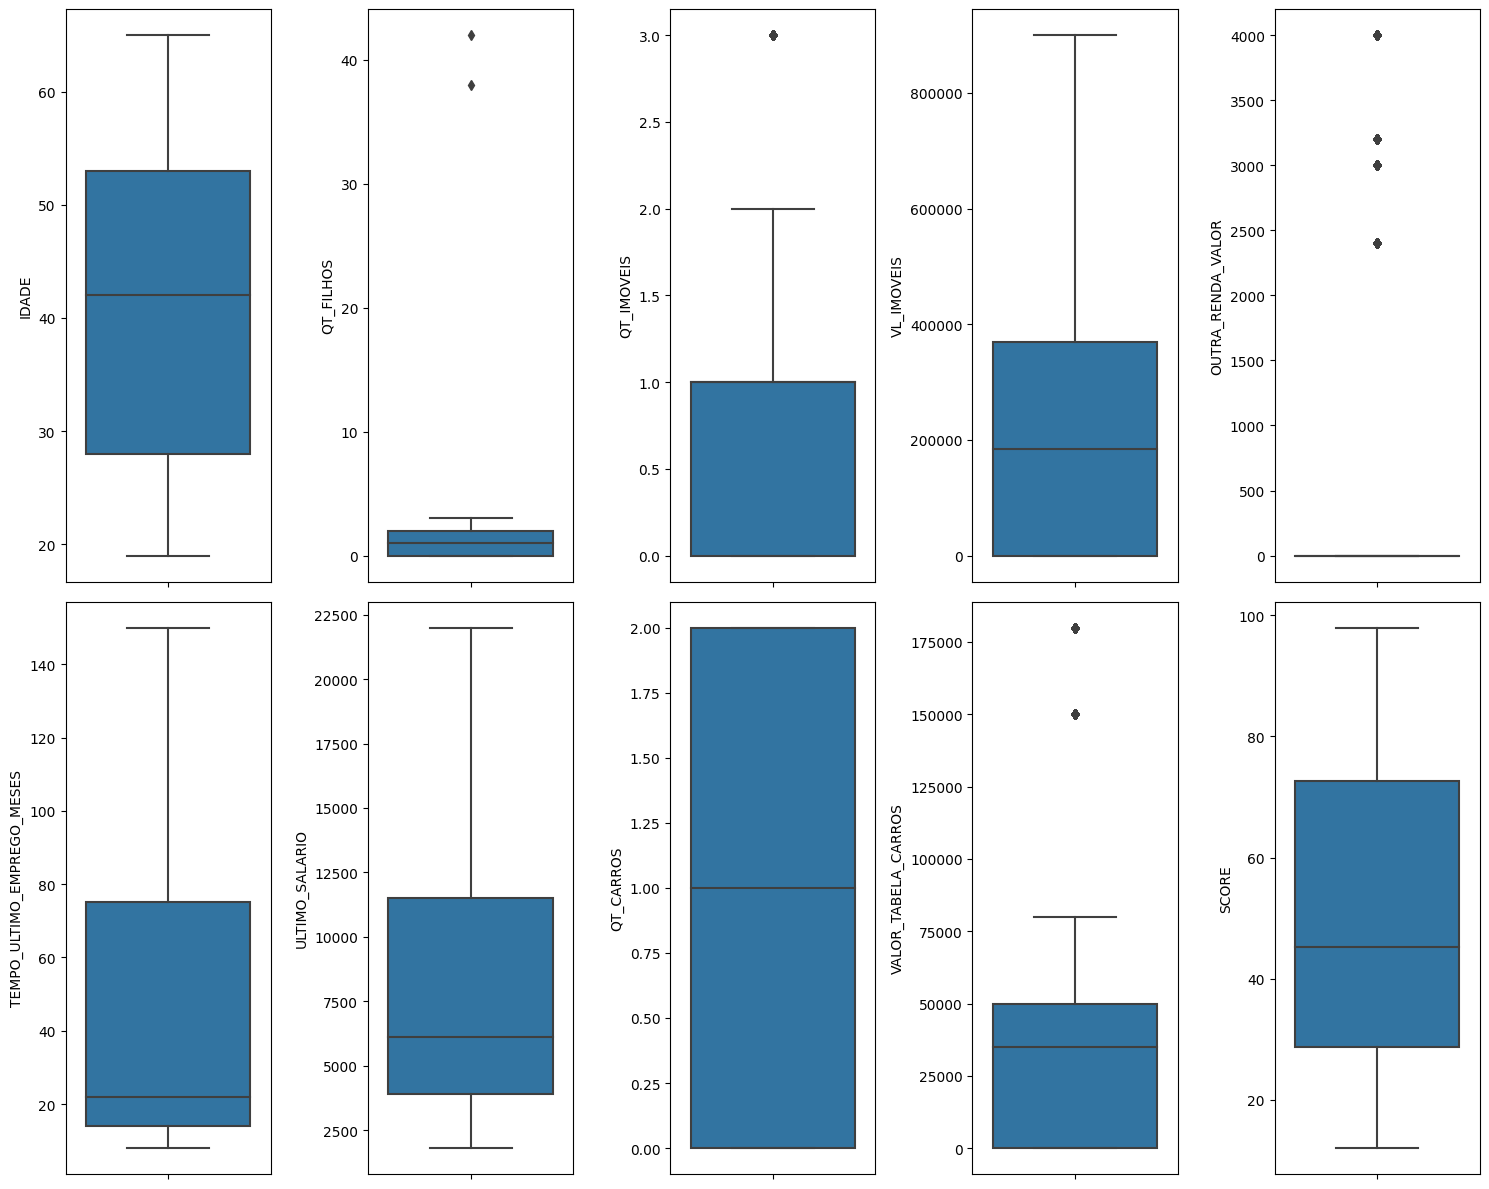

In [49]:
#definindo parametros dos gráficos
plt.rcParams['figure.figsize'] = [15, 12]
plt.rcParams['figure.autolayout'] = True

#linhas x colunas
f, axes = plt.subplots(2,5)

linha = 0
coluna = 0

#gerando os gráficos
for i in num:
  sns.boxplot(data=df, y=i, ax=axes[linha][coluna])
  coluna+=1
  if coluna == 5:
    linha += 1
    coluna = 0

plt.show()

Avaliando os gráficos acima, a variável 'QT_FILHOS' chama bastante atenção ao exibir famílias com registro de 40 filhos, o que nos sinaliza a presença de outliers na veriável em questão. As demais variáveis me parecem aceitáveis. Vamos avaliar.

In [50]:
#Investigando a quantidade de filhos

#listando familias com mais de 4 filhos
df.loc[df['QT_FILHOS']>4]

,UF,IDADE,ESCOLARIDADE,ESTADO_CIVIL,QT_FILHOS,CASA_PROPRIA,QT_IMOVEIS,VL_IMOVEIS,OUTRA_RENDA,OUTRA_RENDA_VALOR,TEMPO_ULTIMO_EMPREGO_MESES,TRABALHANDO_ATUALMENTE,ULTIMO_SALARIO,QT_CARROS,VALOR_TABELA_CARROS,SCORE
27,SP,48,Superior Completo,Divorciado,38,Sim,2,600000,Não,0,15,Sim,15000.0,1,70000,67.166667
10455,SP,45,Segundo Grau Completo,Casado,42,Sim,1,220000,Não,0,18,Sim,2200.0,2,30000,23.000000


In [51]:
#Excluindo outliers
df.drop(df.loc[df['QT_FILHOS']>4].index, inplace=True)

Avaliando demais variaveis que apresentaram outliers

In [52]:
df['OUTRA_RENDA_VALOR'].value_counts()

0       8350
3000     612
4000     522
3200     522
2400     468
Name: OUTRA_RENDA_VALOR, dtype: int64

Sobre os valores de outra renda, estão totalmente dentro da realidade, não aparentando ser um outlier. Sendo assim, sem necessidade de tratamento.

In [54]:
df['VALOR_TABELA_CARROS'].value_counts()

0         3762
50000     1314
35000      792
40000      792
30000      791
48000      522
180000     522
80000      522
70000      521
150000     468
28000      468
Name: VALOR_TABELA_CARROS, dtype: int64

In [55]:
df['QT_IMOVEIS'].value_counts()

0    4680
1    3761
3    1044
2     989
Name: QT_IMOVEIS, dtype: int64

O mesmo para as variáveis acima.

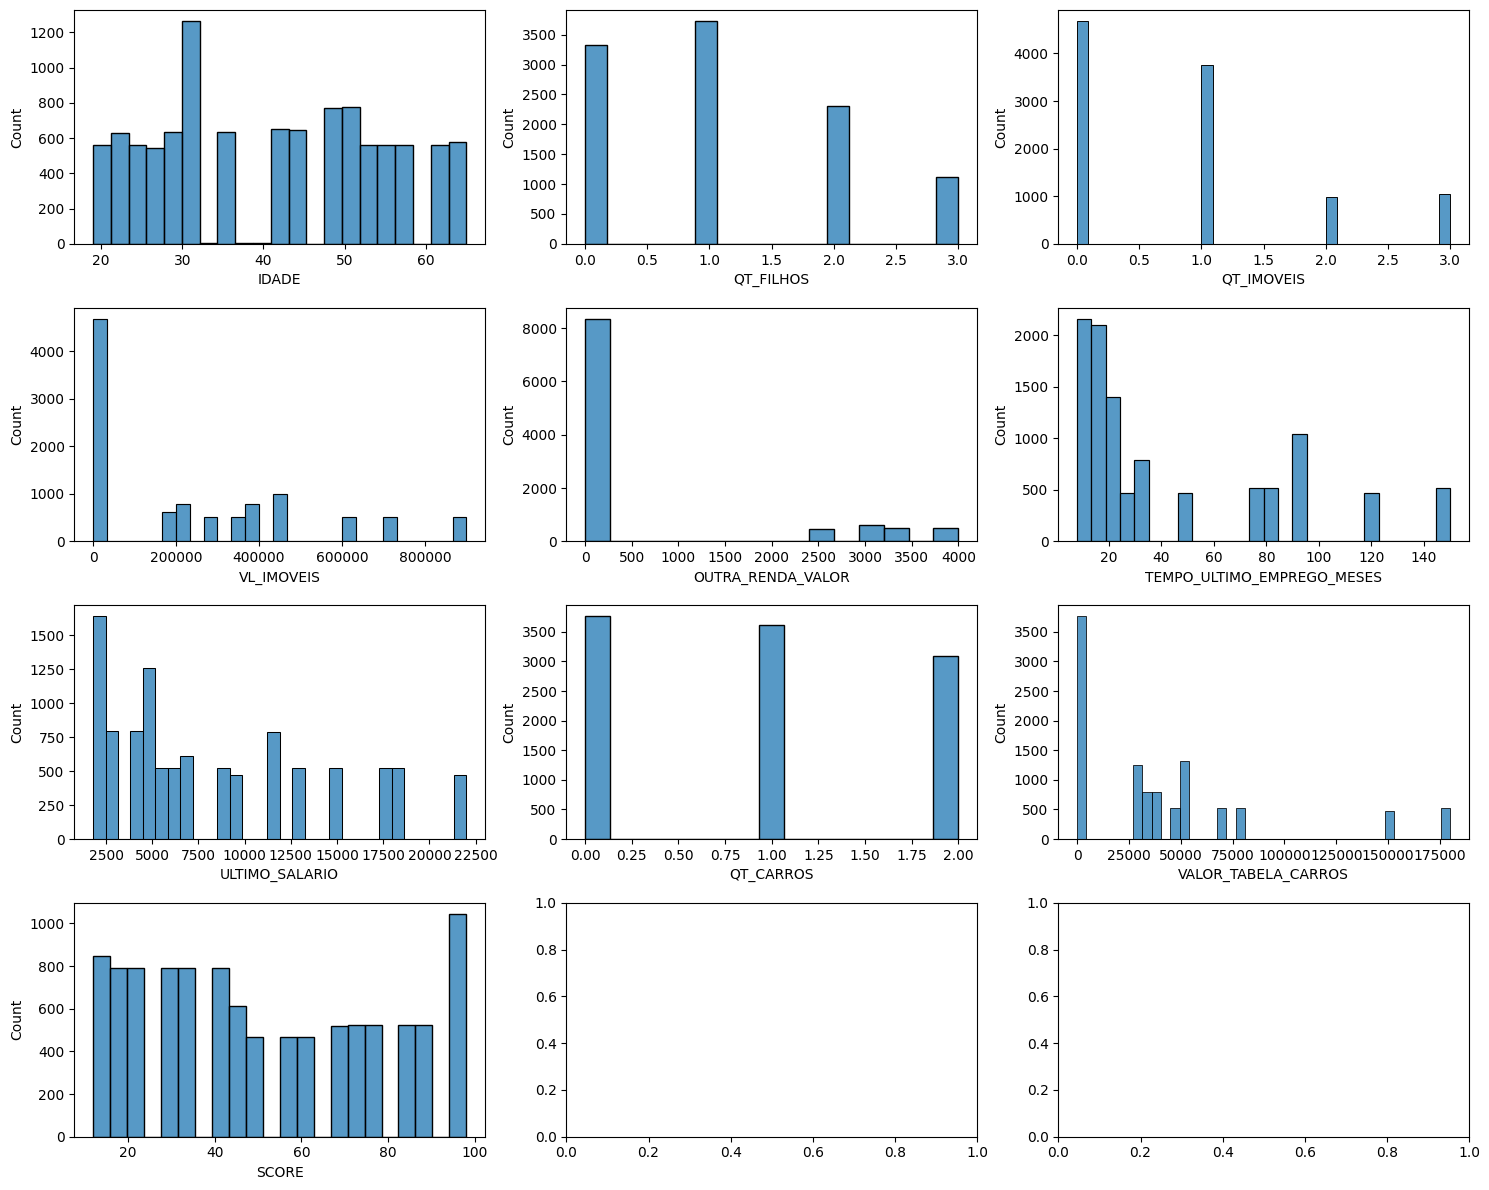

In [58]:
#definindo parametros dos gráficos
plt.rcParams['figure.figsize'] = [15, 12]
plt.rcParams['figure.autolayout'] = True

#linhas x colunas
f, axes = plt.subplots(4,3)

linha = 0
coluna = 0

#gerando os gráficos
for i in num:
  sns.histplot(data=df, x=i, ax=axes[linha][coluna])
  coluna+=1
  if coluna == 3:
    linha += 1
    coluna = 0

plt.show()

Devido o formato das distribuições apresentadas, nota-se que não há distribuição normal em nenhum dos casos, tornando necessário realizar uma normalização dos dados.

<ipython-input-63-d82632c3a955>:15: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True, annot_kws = annot_kws, fmt='.2f', linewidth=.5, cmap='viridis');


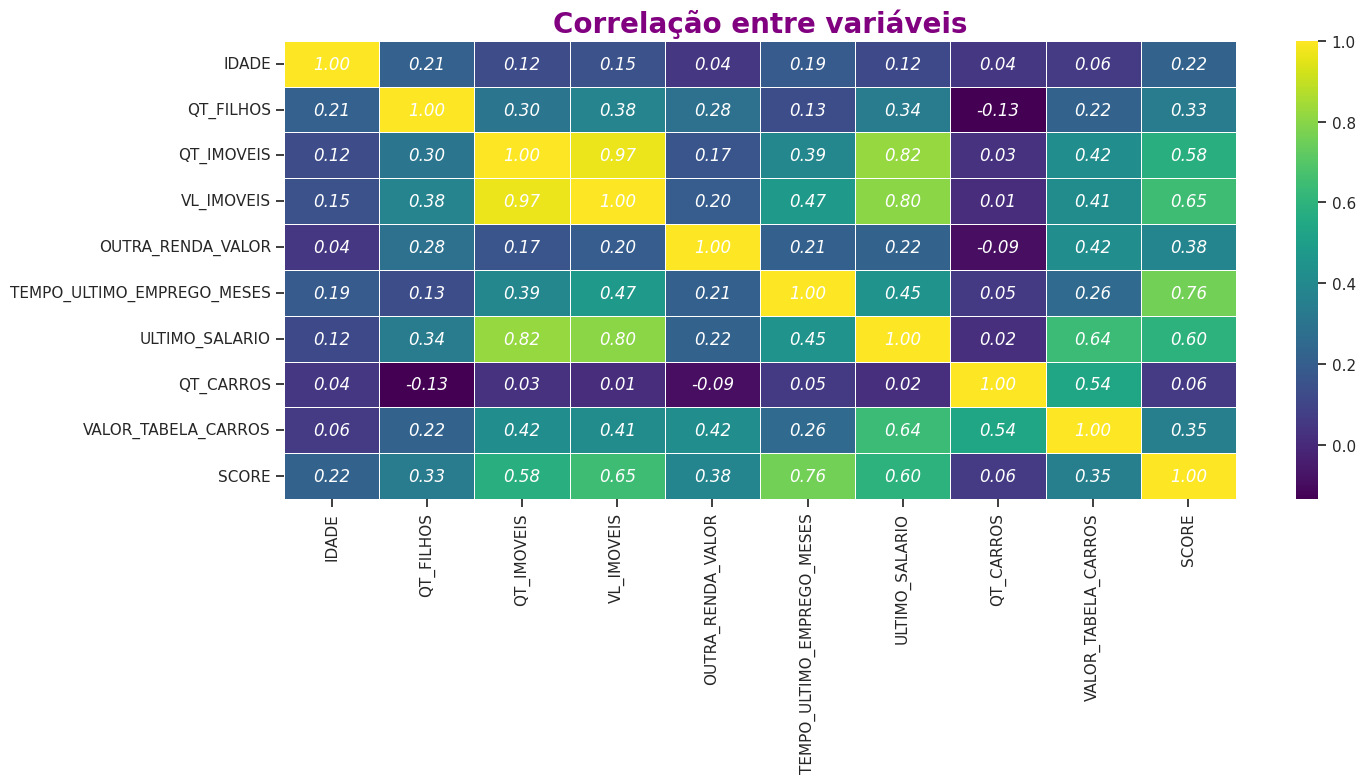

In [63]:
#Avaliando correlação das variáveis
#Estabelecendo correlação entre variáveis contínuas
annot_kws={'fontsize':12,
           'fontstyle':'italic',
           'color':"w",
           'alpha':1,
           'horizontalalignment':'center'}

sns.set(rc={'figure.figsize':(15,8), 'figure.facecolor':'white'})
sns.set_style("ticks")
plt.title('Correlação entre variáveis', fontsize=20, fontweight='bold',color='purple');

#utlizando variaveis contínuas para realizar a correlação de Pearson (r)
sns.heatmap(df.corr(),annot=True, annot_kws = annot_kws, fmt='.2f', linewidth=.5, cmap='viridis');

Analisando variáveis com maior correlação

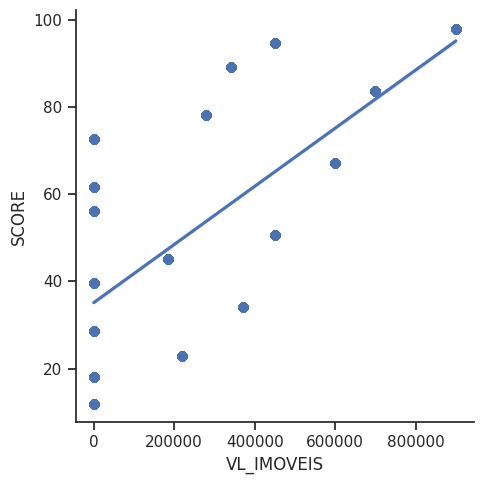

In [65]:
sns.lmplot(x='VL_IMOVEIS', y='SCORE', data = df)

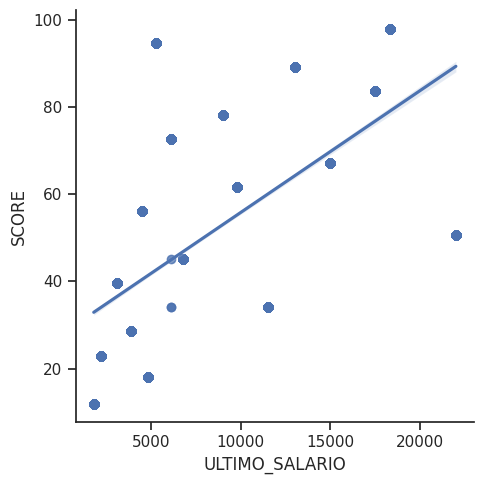

In [66]:
sns.lmplot(x='ULTIMO_SALARIO', y='SCORE', data = df)

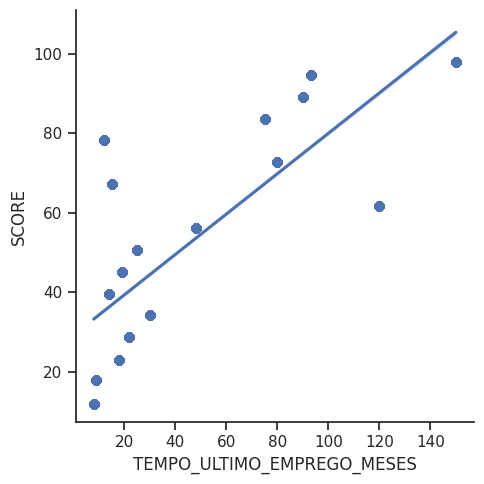

In [67]:
sns.lmplot(x='TEMPO_ULTIMO_EMPREGO_MESES', y='SCORE', data = df)

Observa-se uma relação de crescimento proporcional entre as variáveis com a variável Target (score), quanto maiores forem essas variáveis, maior tende a ser o score.

In [71]:
print('Menor idade:', df['IDADE'].min())
print('Maior idade:', df['IDADE'].max())

Menor idade: 19
Maior idade: 65


In [73]:
#Criando nova variavel a partir da idade
idade_bins = [0, 30, 40, 50, 60]
idade_categoria = ['Até 30', '31 a 40', '41 a 50', 'Maior que 50']

#Adicionando faixas de idade e criando categorias para nova coluna
df['FAIXA_ETÁRIA'] = pd.cut(df['IDADE'], idade_bins, labels=idade_categoria)

#exibindo valores por categoria
df['FAIXA_ETÁRIA'].value_counts()

Até 30          3552
Maior que 50    2448
41 a 50         2070
31 a 40         1270
Name: FAIXA_ETÁRIA, dtype: int64

In [75]:
#AVALIANDO SCORE MEDIO POR FAIXA ETÁRIA
df.groupby(['FAIXA_ETÁRIA']).mean()['SCORE']

<ipython-input-75-094d31519352>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby(['FAIXA_ETÁRIA']).mean()['SCORE']


FAIXA_ETÁRIA
Até 30          44.762950
31 a 40         48.883202
41 a 50         51.440177
Maior que 50    56.123775
Name: SCORE, dtype: float64

### Avaliando variáveis categoricas

In [82]:
#Criando lista apenas com variaveis categoricas
categ = []
for i in df.columns[0:48].tolist(): #atentar para limites
  if df.dtypes[i] == 'object' or df.dtypes[i] == 'category':
    print(i, ':', df.dtypes[i])
    categ.append(i)

UF : object
ESCOLARIDADE : object
ESTADO_CIVIL : object
CASA_PROPRIA : object
OUTRA_RENDA : object
TRABALHANDO_ATUALMENTE : object
FAIXA_ETÁRIA : category


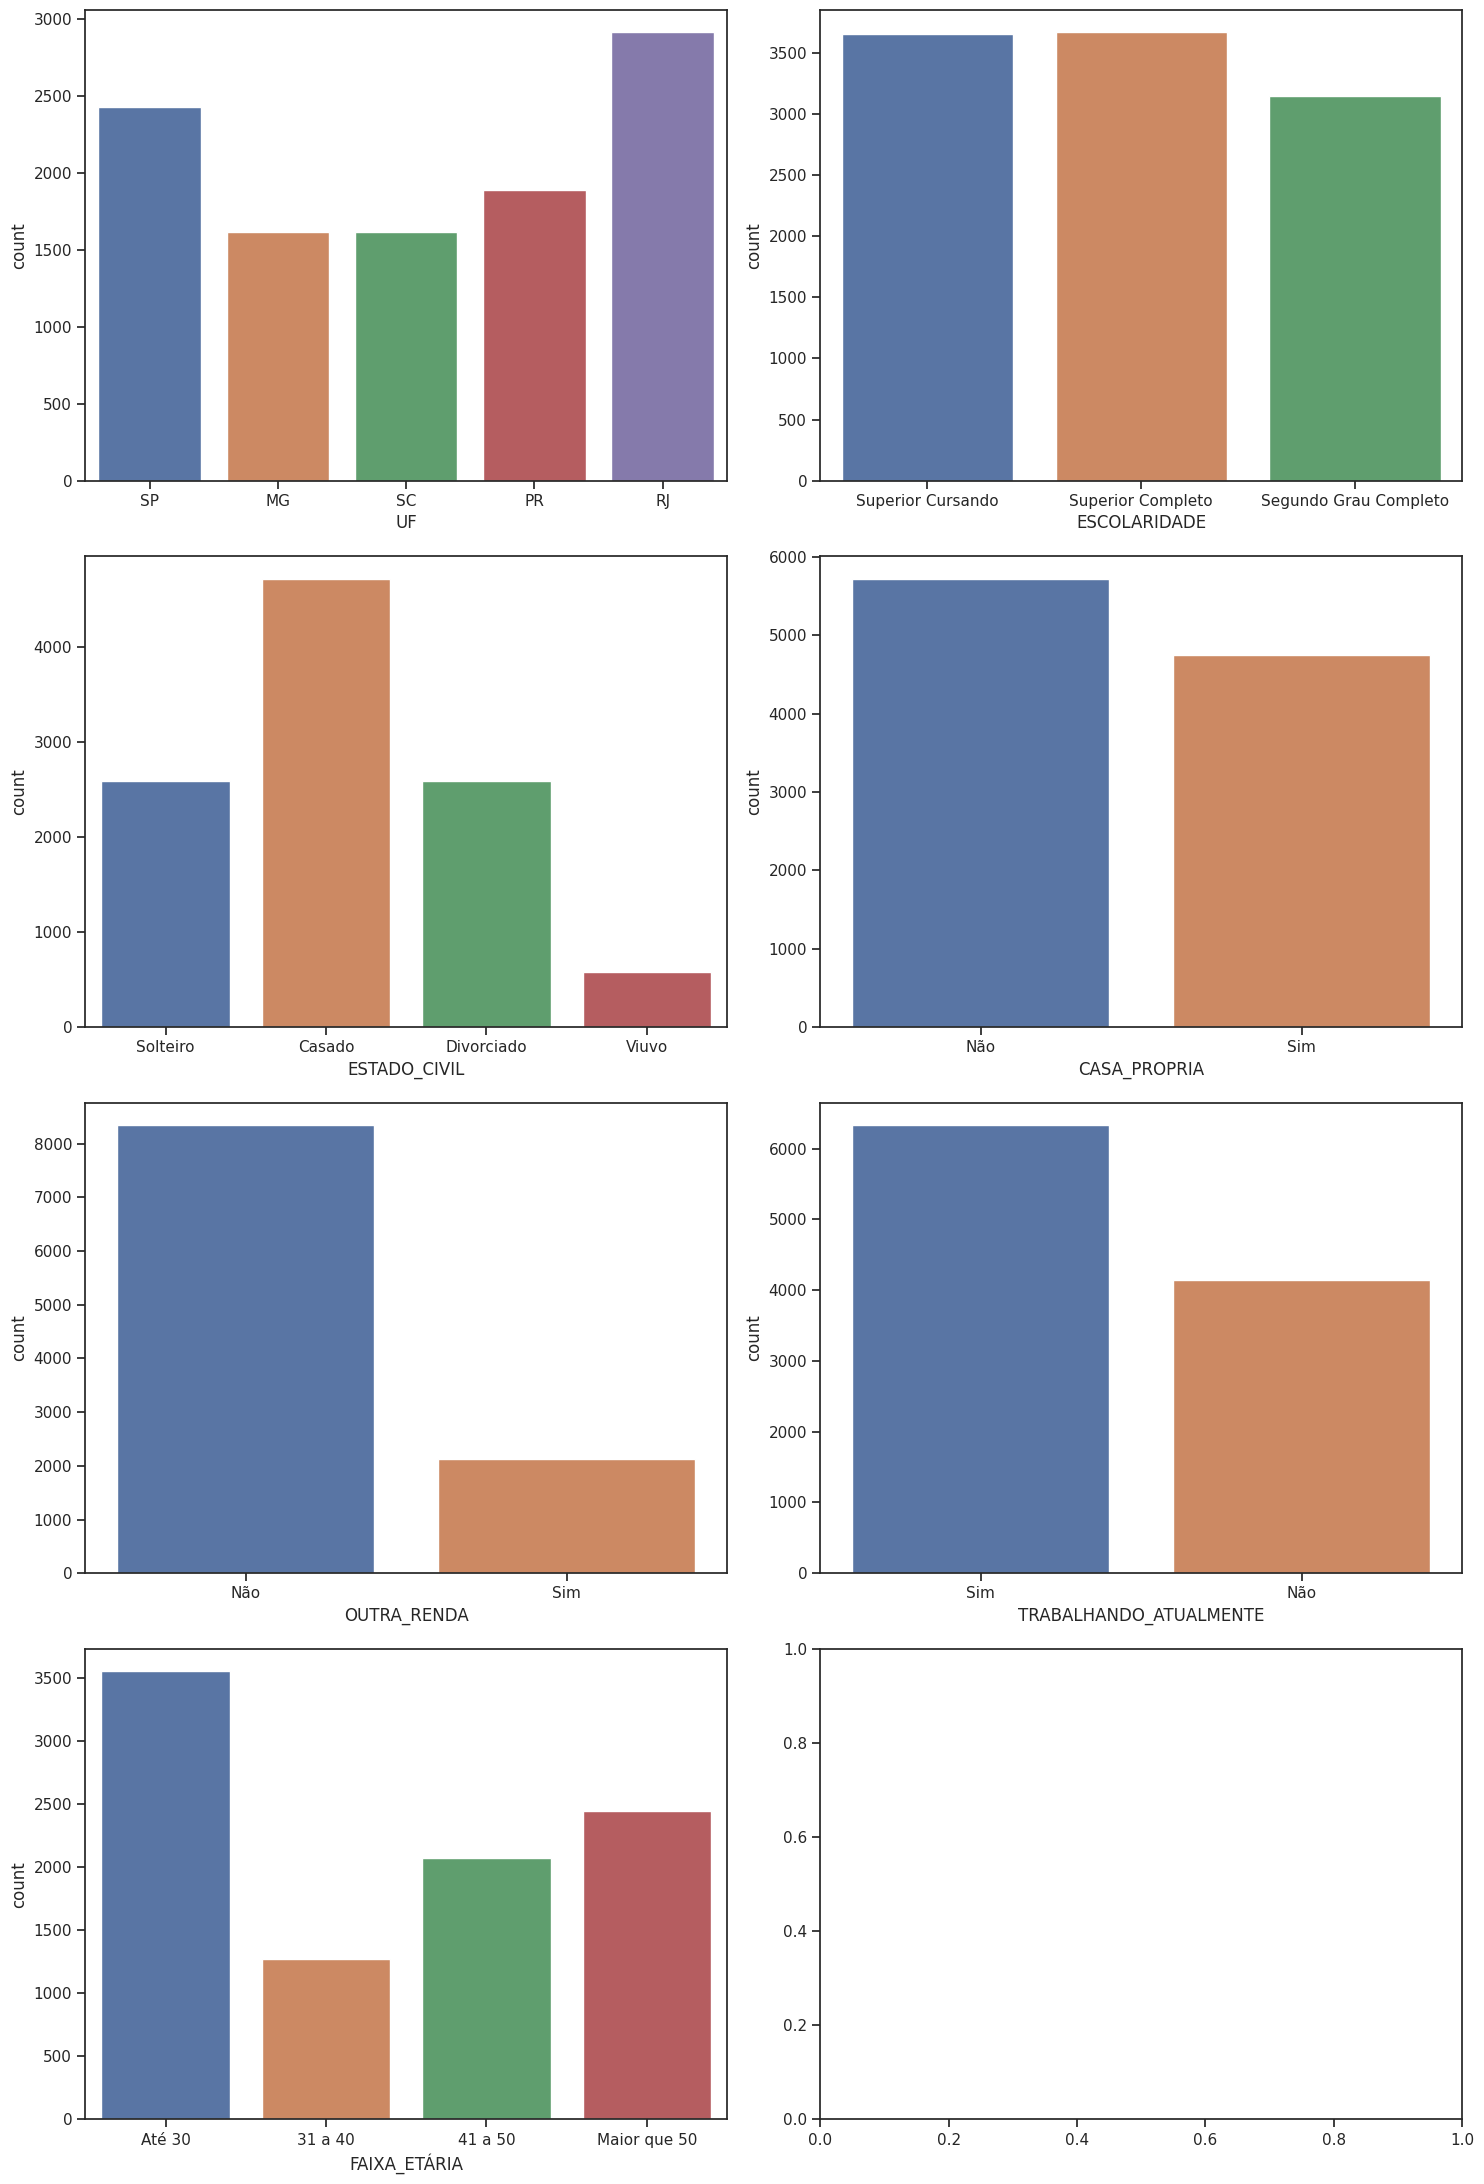

In [83]:
plt.rcParams['figure.figsize'] = [15, 22]
plt.rcParams['figure.autolayout'] = True

#linhas x colunas
f, axes = plt.subplots(4,2)

linha = 0
coluna = 0

#gerando os gráficos
for i in categ:
  sns.countplot(data=df, x=i, ax=axes[linha][coluna])
  coluna+=1
  if coluna == 2:
    linha += 1
    coluna = 0

plt.show()

## Pré processamento

In [88]:
#criando encoder
le = LabelEncoder()

#aplicando em variaveis str
df['FAIXA_ETÁRIA'] = le.fit_transform(df['FAIXA_ETÁRIA'])
df['OUTRA_RENDA'] = le.fit_transform(df['OUTRA_RENDA'])
df['TRABALHANDO_ATUALMENTE'] = le.fit_transform(df['TRABALHANDO_ATUALMENTE'])
df['ESTADO_CIVIL'] = le.fit_transform(df['ESTADO_CIVIL'])
df['CASA_PROPRIA'] = le.fit_transform(df['CASA_PROPRIA'])
df['ESCOLARIDADE'] = le.fit_transform(df['ESCOLARIDADE'])
df['UF'] = le.fit_transform(df['UF'])

#Removendo nan
df.dropna(inplace=True)

In [91]:
df.sample(5)

,UF,IDADE,ESCOLARIDADE,ESTADO_CIVIL,QT_FILHOS,CASA_PROPRIA,QT_IMOVEIS,VL_IMOVEIS,OUTRA_RENDA,OUTRA_RENDA_VALOR,TEMPO_ULTIMO_EMPREGO_MESES,TRABALHANDO_ATUALMENTE,ULTIMO_SALARIO,QT_CARROS,VALOR_TABELA_CARROS,SCORE,FAIXA_ETÁRIA
2045,2,53,0,0,0,0,1,370000,0,0,30,1,11500.0,1,35000,34.166667,3
3361,1,48,1,2,1,1,2,450000,1,2400,25,1,22000.0,1,150000,50.666667,1
7716,2,57,0,0,3,1,1,340000,1,4000,90,1,13000.0,2,180000,89.166667,3
4964,0,28,2,2,0,1,1,185000,1,3000,19,1,6800.0,0,0,45.166667,2
5549,2,35,2,0,1,0,0,0,0,0,120,0,9800.0,0,0,61.666667,0


In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10474 entries, 0 to 10475
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   UF                          10474 non-null  int64  
 1   IDADE                       10474 non-null  int64  
 2   ESCOLARIDADE                10474 non-null  int64  
 3   ESTADO_CIVIL                10474 non-null  int64  
 4   QT_FILHOS                   10474 non-null  int64  
 5   CASA_PROPRIA                10474 non-null  int64  
 6   QT_IMOVEIS                  10474 non-null  int64  
 7   VL_IMOVEIS                  10474 non-null  int64  
 8   OUTRA_RENDA                 10474 non-null  int64  
 9   OUTRA_RENDA_VALOR           10474 non-null  int64  
 10  TEMPO_ULTIMO_EMPREGO_MESES  10474 non-null  int64  
 11  TRABALHANDO_ATUALMENTE      10474 non-null  int64  
 12  ULTIMO_SALARIO              10474 non-null  float64
 13  QT_CARROS                   104

In [93]:
#separando variavel alvo
target = df.iloc[:,15:16] #todas as linhas do indice 15

In [107]:
#separando predict

predito = df.copy()

#Excluindo variavel target
del predito['SCORE']

predito.head()

,UF,IDADE,ESCOLARIDADE,ESTADO_CIVIL,QT_FILHOS,CASA_PROPRIA,QT_IMOVEIS,VL_IMOVEIS,OUTRA_RENDA,OUTRA_RENDA_VALOR,TEMPO_ULTIMO_EMPREGO_MESES,TRABALHANDO_ATUALMENTE,ULTIMO_SALARIO,QT_CARROS,VALOR_TABELA_CARROS,FAIXA_ETÁRIA
0,4,19,2,2,0,0,0,0,0,0,8,1,1800.0,0,0,2
1,0,23,1,2,1,0,0,0,0,0,9,0,4800.0,1,50000,2
2,3,25,0,0,0,1,1,220000,0,0,18,1,2200.0,2,30000,2
3,1,27,2,0,1,1,0,0,0,0,22,0,3900.0,0,0,2
4,2,28,1,1,2,0,1,370000,0,0,30,1,6100.0,1,35000,2


In [109]:
#train_test_split
X_treino, X_teste, Y_treino, Y_teste = train_test_split(predito, target, test_size=0.3, random_state=42)

In [110]:
#Normalizando em treino e teste

sc = MinMaxScaler()
X_treino_normal = sc.fit_transform(X_treino)
X_teste_normal = sc.fit_transform(X_teste)

## Criando modelo


In [180]:
#Treino
modelo = LinearRegression()
modelo = modelo.fit(X_treino_normal, Y_treino)

In [181]:
r2_score(Y_teste, modelo.fit(X_treino_normal, Y_treino).predict(X_teste_normal))

0.79739028145697

In [129]:
df.columns

Index(['UF', 'IDADE', 'ESCOLARIDADE', 'ESTADO_CIVIL', 'QT_FILHOS',
       'CASA_PROPRIA', 'QT_IMOVEIS', 'VL_IMOVEIS', 'OUTRA_RENDA',
       'OUTRA_RENDA_VALOR', 'TEMPO_ULTIMO_EMPREGO_MESES',
       'TRABALHANDO_ATUALMENTE', 'ULTIMO_SALARIO', 'QT_CARROS',
       'VALOR_TABELA_CARROS', 'SCORE', 'FAIXA_ETÁRIA'],
      dtype='object')

In [194]:
UF = 2
IDADE = 42
ESCOLARIDADE = 1
ESTADO_CIVIL = 2
QT_FILHOS = 1
CASA_PROPRIA = 1
QT_IMOVEIS = 1
VL_IMOVEIS = 300000
OUTRA_RENDA = 1
OUTRA_RENDA_VALOR = 2000
TEMPO_ULTIMO_EMPREGO_MESES = 18
TRABALHANDO_ATUALMENTE = 1
ULTIMO_SALARIO = 40000.0
QT_CARROS = 4
VALOR_TABELA_CARROS = 70000
FAIXA_ETÁRIA = 3

novos_dados = [UF, IDADE, ESCOLARIDADE, ESTADO_CIVIL, QT_FILHOS,
               CASA_PROPRIA, QT_IMOVEIS, VL_IMOVEIS, OUTRA_RENDA,
               OUTRA_RENDA_VALOR, TEMPO_ULTIMO_EMPREGO_MESES, TRABALHANDO_ATUALMENTE, ULTIMO_SALARIO, QT_CARROS,
               VALOR_TABELA_CARROS, FAIXA_ETÁRIA]

X = np.array(novos_dados).reshape(1,-1)
X = sc.transform(X)

print(modelo.predict(X))

[[2553004.66241051]]
